<a href="https://colab.research.google.com/github/Staffilon/KestraDataOrchestrator/blob/main/collected_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
%cd "gdrive/MyDrive/Dati-TBDM/refined_data"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
energy_df = pd.read_csv("modified_energy_data.csv")
fermate_df = pd.read_csv("modified_fermate_data.csv")
merged_data_df = pd.read_csv("energy_fermate_merged.csv")

# Datasets info
Basic information about the modified datasets

In [ ]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567805 entries, 0 to 567804
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         567805 non-null  int64  
 1   TimeStamp  567805 non-null  object 
 2   Ea_Imp     567805 non-null  float64
 3   channel    567805 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 17.3+ MB


In [ ]:
energy_df.describe()

,ID,Ea_Imp,channel
count,567805.000000,567805.000000,567805.000000
mean,415599.493389,1283.239437,380.640699
std,237965.207710,2762.382640,144.443310
min,1.000000,0.000000,108.000000
25%,210367.000000,0.000000,305.000000
50%,416576.000000,98.100000,310.000000
75%,620637.000000,1614.200000,515.000000
max,825141.000000,18761.200000,618.000000


In [ ]:
fermate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102827 entries, 0 to 102826
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   SHIFT_DATE        102827 non-null  object
 1   SHIFT_CODE        102827 non-null  int64 
 2   SHIFT_START       102827 non-null  object
 3   SHIFT_END         102827 non-null  object
 4   RESOURCE          102827 non-null  int64 
 5   PRODUCTION_ORDER  102827 non-null  int64 
 6   STAGE             102827 non-null  int64 
 7   STOP_CODE         102827 non-null  int64 
 8   T_STOP            102827 non-null  int64 
 9   QTY_GOOD          102827 non-null  int64 
 10  QTY_SCRAP         102827 non-null  int64 
 11  DESFERM           102827 non-null  object
dtypes: int64(8), object(4)
memory usage: 9.4+ MB


In [ ]:
merged_data_df.describe()

,ID,SHIFT_CODE,RESOURCE,PRODUCTION_ORDER,STAGE,STOP_CODE,T_STOP,QTY_GOOD,QTY_SCRAP,EnergyRetrieval_ID,Energy_Value
count,102827.000000,102827.0,102827.000000,1.028270e+05,102827.0,102827.000000,102827.000000,102827.000000,102827.000000,31691.000000,31691.000000
mean,51414.000000,0.0,372.357328,9.942858e+09,10.0,8.509069,13.683673,-0.247328,0.431112,416042.183964,3783.777117
std,29683.742402,0.0,180.177680,3.808512e+05,0.0,6.919263,56.455398,18.737138,18.504152,270385.089780,4394.848408
min,1.000000,0.0,108.000000,9.941123e+09,10.0,0.000000,1.000000,-5000.000000,0.000000,5298.000000,0.000000
25%,25707.500000,0.0,302.000000,9.943010e+09,10.0,0.000000,1.000000,0.000000,0.000000,151362.000000,1463.700000
50%,51414.000000,0.0,310.000000,9.943031e+09,10.0,11.000000,4.000000,0.000000,0.000000,430044.000000,2014.000000
75%,77120.500000,0.0,610.000000,9.943061e+09,10.0,15.000000,9.000000,0.000000,0.000000,662655.500000,3205.850000
max,102827.000000,0.0,618.000000,9.943102e+09,10.0,15.000000,1439.000000,440.000000,5000.000000,824367.000000,18578.100000


# Energymeters and Machine Analysis
Comparing the values of the energymeter dataset against the stoppage dataset merged with the energymeters' one

In [ ]:
#Condition that will account for stop entries with associated energymeter values
mask_not_null = merged_data_df['Energy_Value'].notna()

Analysis on merged dataset

In [ ]:
#Total number of entries with not null energymeter values
total_entries_count_not_null = mask_not_null.sum()
print(f'Total count of entries where Energy_Value is not null: {total_entries_count_not_null}')

Total count of entries where Energy_Value is not null: 31691


In [ ]:
# Number of data entries per machine (RESOURCE)
entries_count_stats = merged_data_df[mask_not_null].groupby('RESOURCE').agg({
    'STOP_CODE': 'count',
}).rename(columns={'STOP_CODE': 'Entries Count'})


print(entries_count_stats)

          Entries Count
RESOURCE               
108                1614
110                3216
301                1172
302                1393
303                1309
304                1137
305                 427
306                1453
307                1270
308                 960
309                1219
310                 920
313                1280
314                 979
315                1140
319                1534
515                1458
610                2167
611                1734
612                1281
614                2749
618                1279


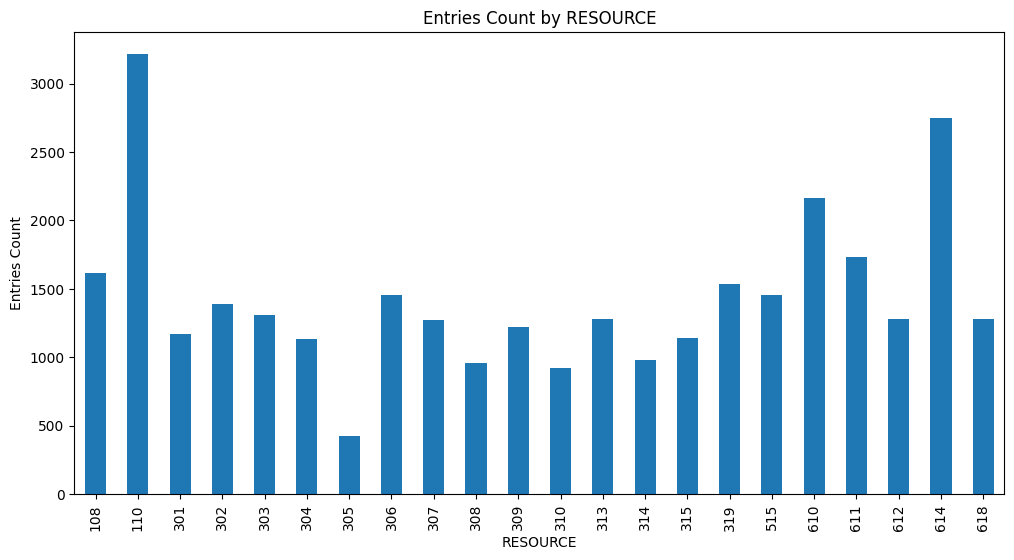

In [ ]:
#Graph showing the results
entries_count_stats['Entries Count'].plot(kind='bar', figsize=(12, 6), title='Entries Count by RESOURCE')
plt.xlabel('RESOURCE')
plt.ylabel('Entries Count')
plt.show()

Mean energy values per machine: differences between energymeters dataset and merged one

In [ ]:
#Stats for the energymeters' dataset
mean_energy_stats = merged_data_df[mask_not_null].groupby('RESOURCE').agg({
    'Energy_Value': 'mean'
}).reset_index().rename(columns={'Energy_Value': 'Mean Energy Levels', 'RESOURCE': 'Machine'})

print(mean_energy_stats)

    Machine  Mean Energy Levels
0       108           14.245229
1       110         1605.276088
2       301         1546.536604
3       302         1714.163245
4       303         1702.168831
5       304         1512.946878
6       305         1660.169321
7       306         2664.768204
8       307         1224.432283
9       308         1724.006146
10      309         1899.650123
11      310         1719.192935
12      313         2037.176641
13      314         1573.951890
14      315         1704.170614
15      319         1742.990874
16      515         8737.604938
17      610        13465.638394
18      611         2319.365052
19      612         2681.067603
20      614        12021.957148
21      618         2892.997576


In [ ]:
#Energy stats for the merged dataset
mean_energy_per_machine_stats = energy_df.groupby('channel').agg({'Ea_Imp': 'mean'}).reset_index().rename(
    columns={'Ea_Imp': 'Mean Energy Levels', 'channel': 'Machine'})

print(mean_energy_per_machine_stats)

    Machine  Mean Energy Levels
0       108           12.850461
1       110          798.777596
2       301          702.691234
3       302          742.613017
4       303          667.007712
5       304          590.506193
6       305          449.275889
7       306          949.879441
8       307          471.107374
9       308          547.899759
10      309          738.324873
11      310          579.242719
12      313         1001.145456
13      314          508.138316
14      315          616.054741
15      319          809.864619
16      515         3769.373928
17      610         5618.905493
18      611          894.940427
19      612         1015.888721
20      614         5040.419542
21      618          831.039977


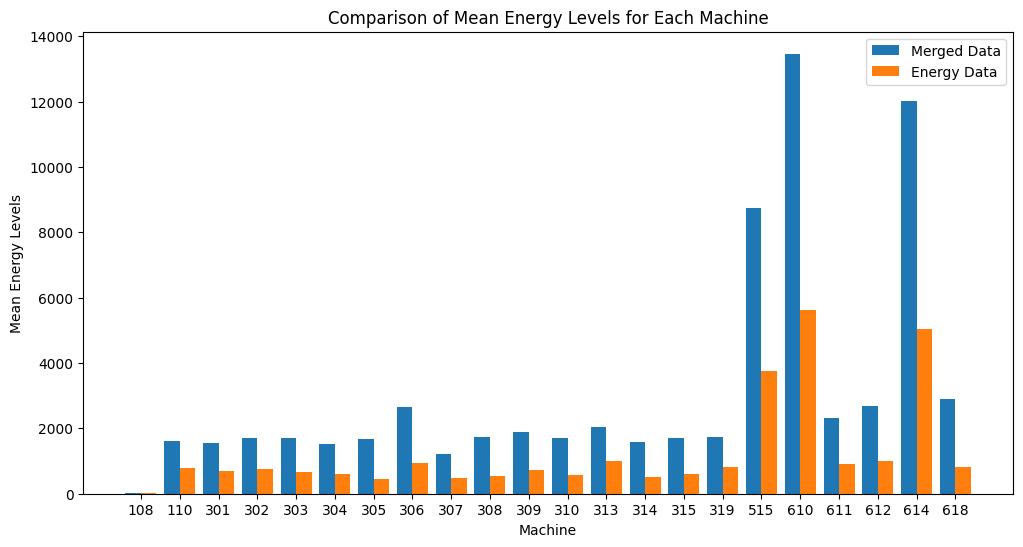

In [ ]:
# We combine the dataframes for easier plotting
combined_data = pd.merge(mean_energy_stats, mean_energy_per_machine_stats, on='Machine', how='outer')

# We sort the dataframes by machine
combined_data = combined_data.sort_values('Machine')

# Here we configure the side by side bar plot
width = 0.4  # Width of the bars
x = np.arange(len(combined_data['Machine']))

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, combined_data['Mean Energy Levels_x'], width, label='Merged Data')
rects2 = ax.bar(x + width/2, combined_data['Mean Energy Levels_y'], width, label='Energy Data')

ax.set_xlabel('Machine')
ax.set_ylabel('Mean Energy Levels')
ax.set_title('Comparison of Mean Energy Levels for Each Machine')
ax.set_xticks(x)
ax.set_xticklabels(combined_data['Machine'])
ax.legend()

plt.show()

# Analysis of STOP_CODE in the merged dataset
0 = Iindeterminata


1 = Avviamento

15 = Ordinaria (Truciolo/Carico barre)

In [ ]:
# Grouping the merged dataframe by STOP_CODE and calculating the mean of energy values based on the number of non null entries
energy_value_stats = merged_data_df[mask_not_null].groupby('STOP_CODE').agg({
    'STOP_CODE': 'count',
    'Energy_Value': 'mean'
}).rename(columns={'STOP_CODE': 'Entries Count', 'Energy_Value': 'Mean Energy Level'})

print(energy_value_stats)

           Entries Count  Mean Energy Level
STOP_CODE                                  
0                  11590        3845.794254
1                   2968        3194.764858
2                    405        1577.617531
4                    723        4474.461272
6                    235        3425.416596
7                      5        2871.340000
8                    359        2350.142618
9                     64        2112.242188
10                  1879        4302.586535
11                  1019        3089.616487
12                   147        3651.067347
14                     1          37.800000
15                 12296        3937.463744


In [ ]:
# Group by 'RESOURCE' and 'STOP_CODE'
resource_stop_code_stats = merged_data_df[mask_not_null].groupby(['RESOURCE', 'STOP_CODE']).agg({
    'RESOURCE': 'count',
    'Energy_Value': 'mean'
}).rename(columns={'RESOURCE': 'Entries Count', 'Energy_Value': 'Mean Energy Value'})

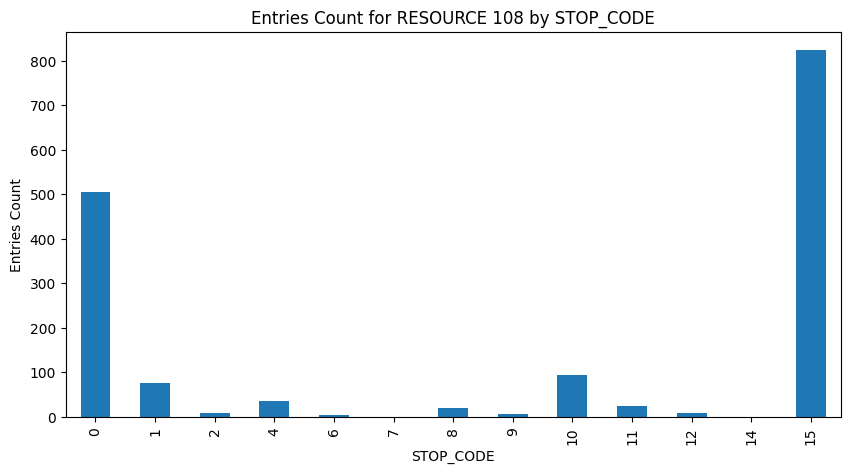

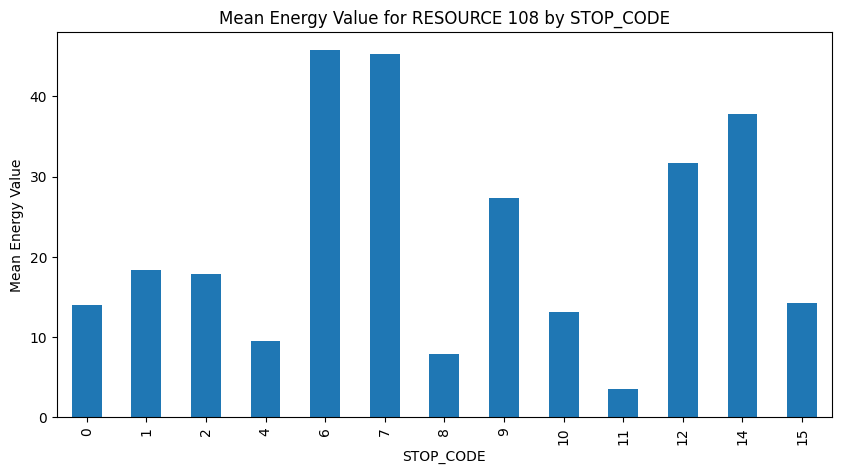

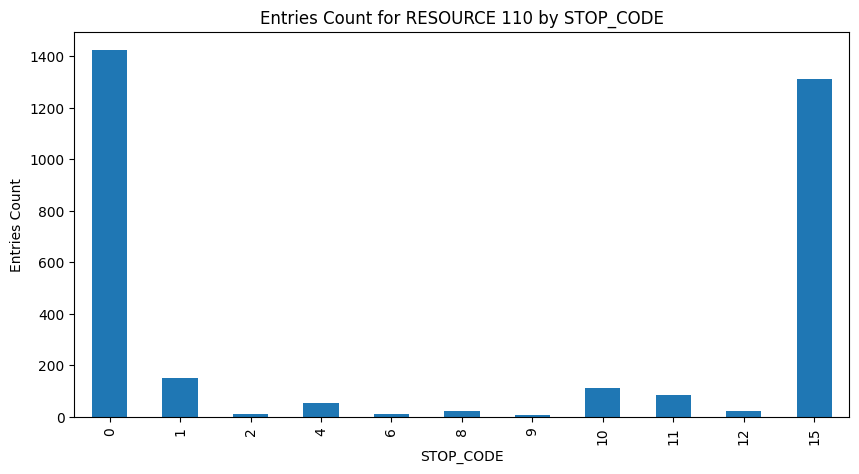

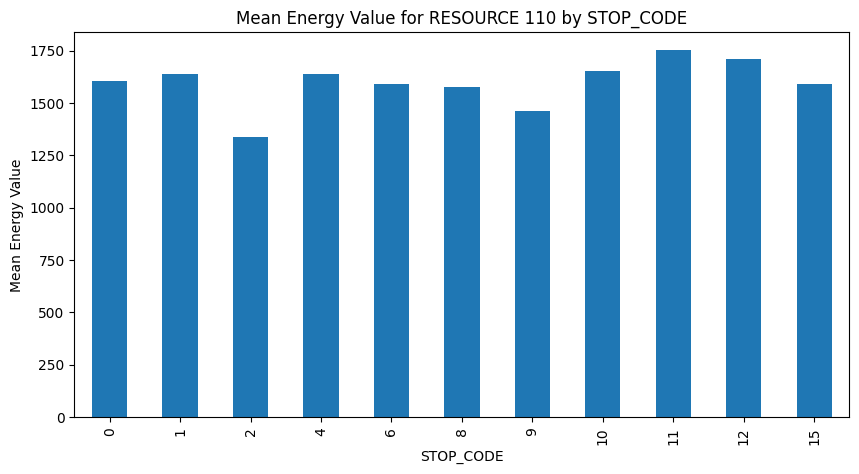

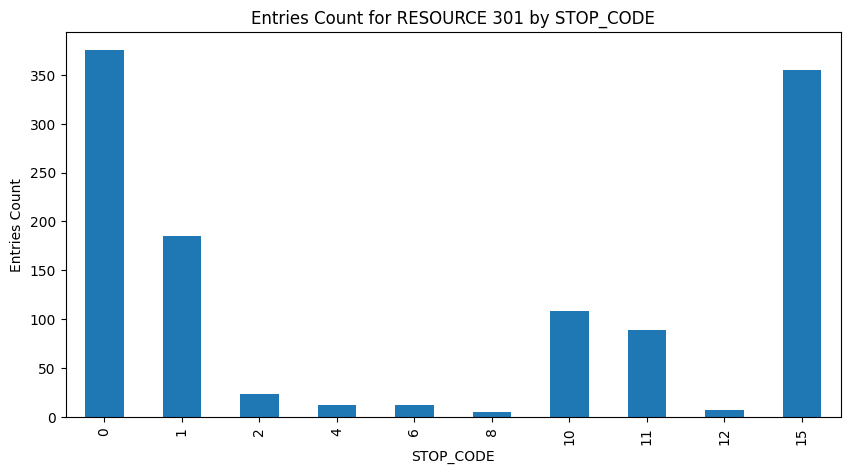

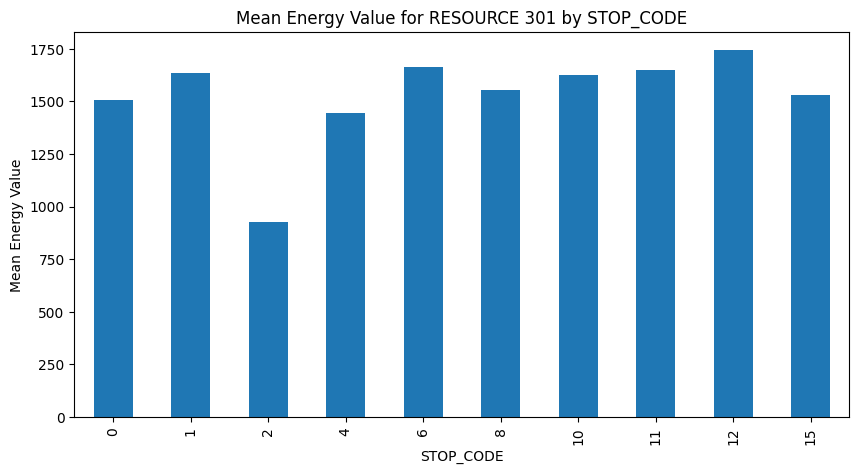

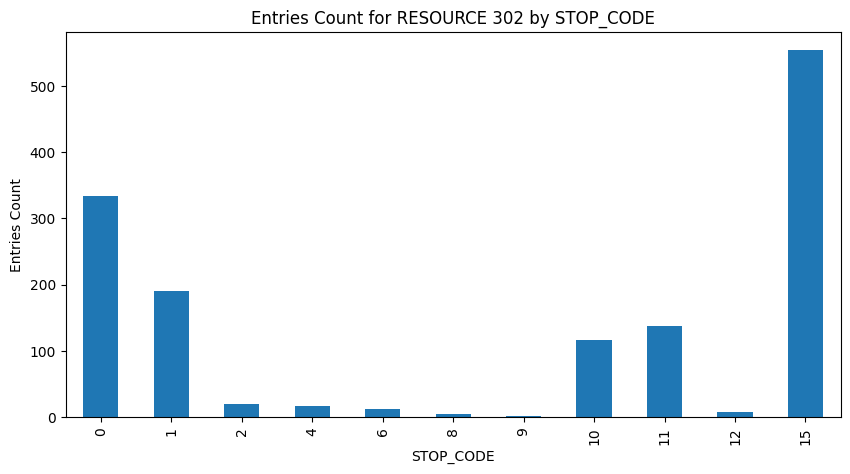

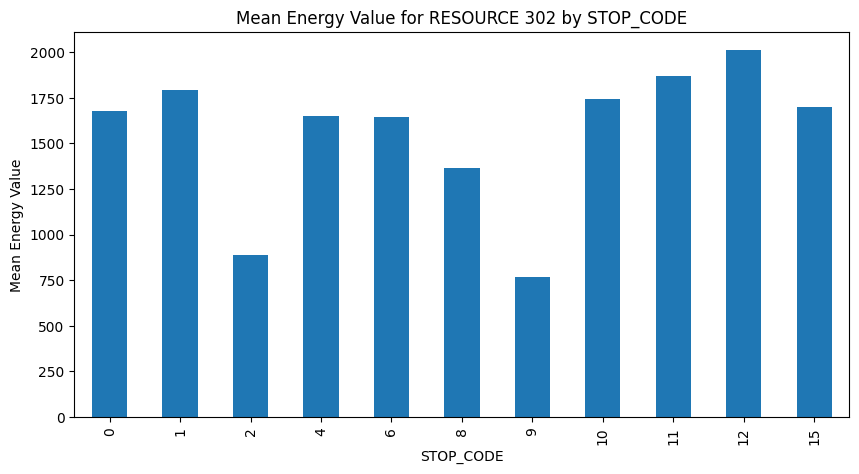

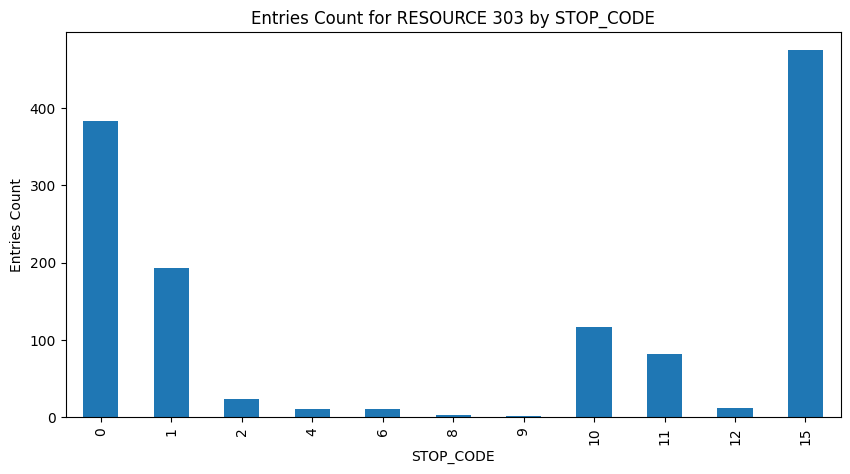

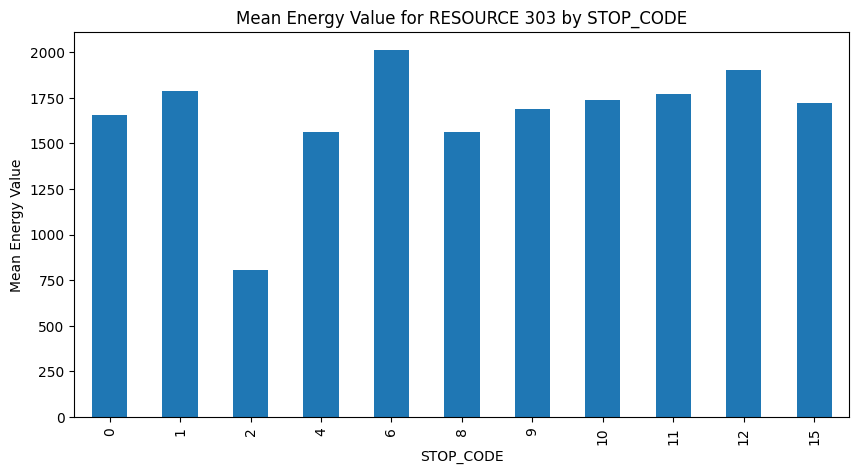

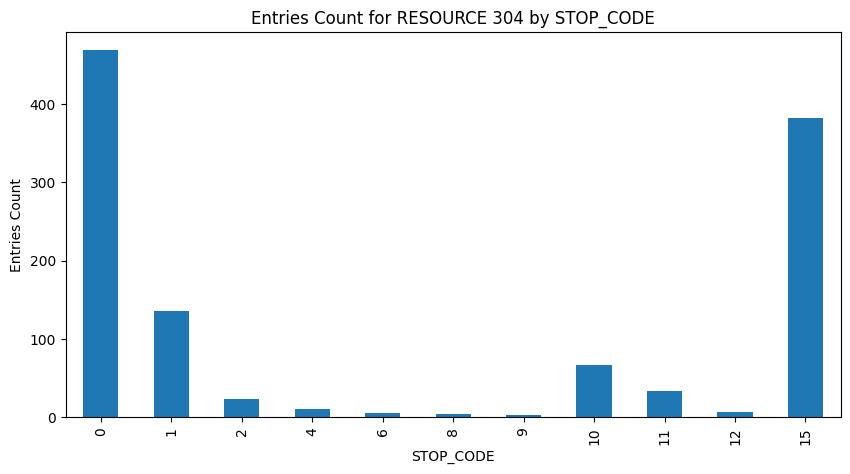

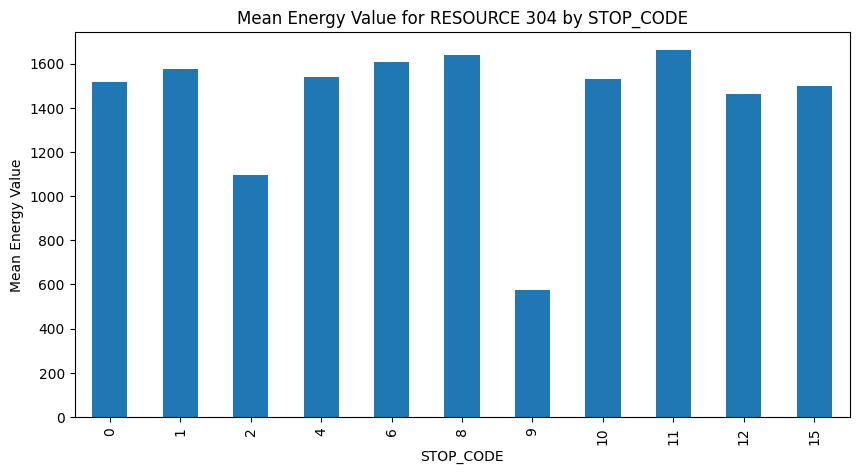

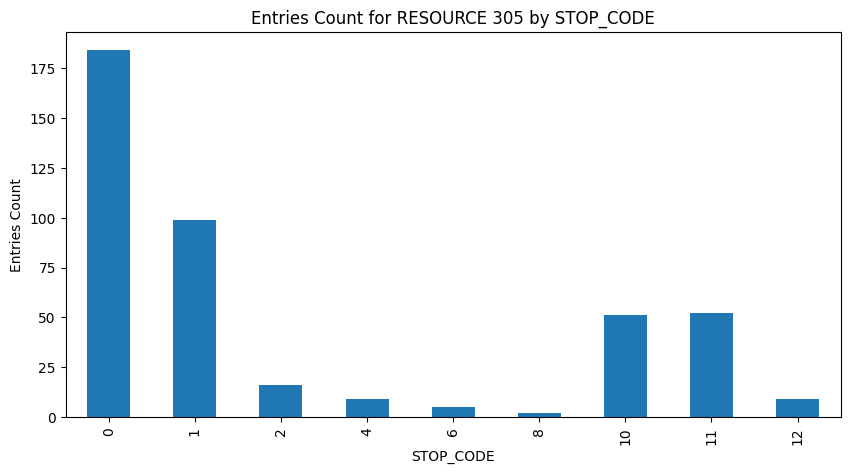

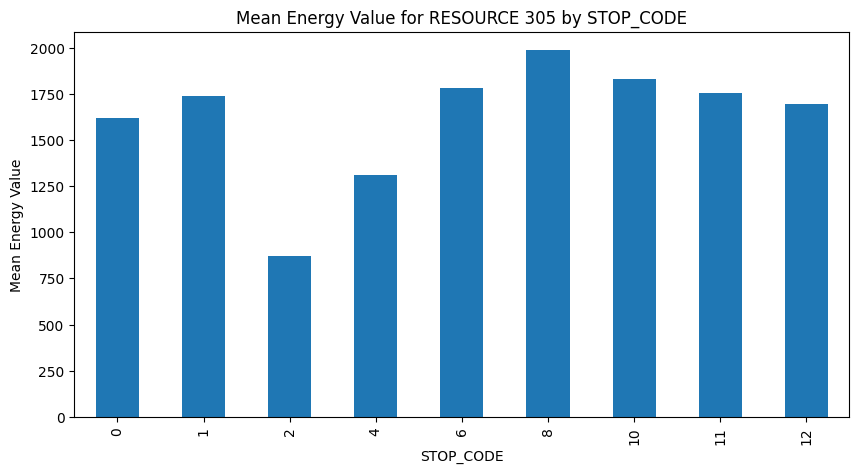

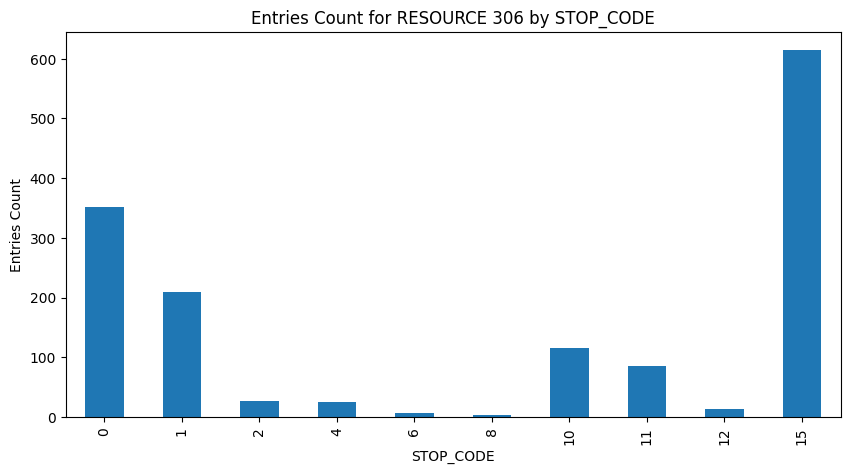

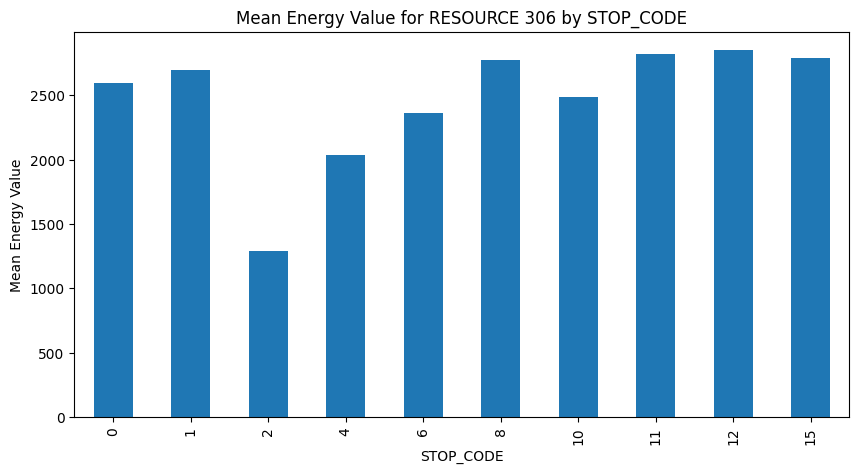

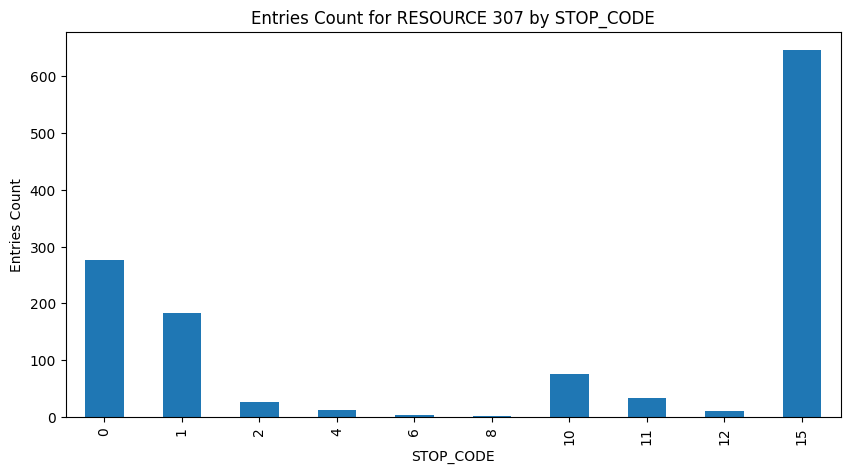

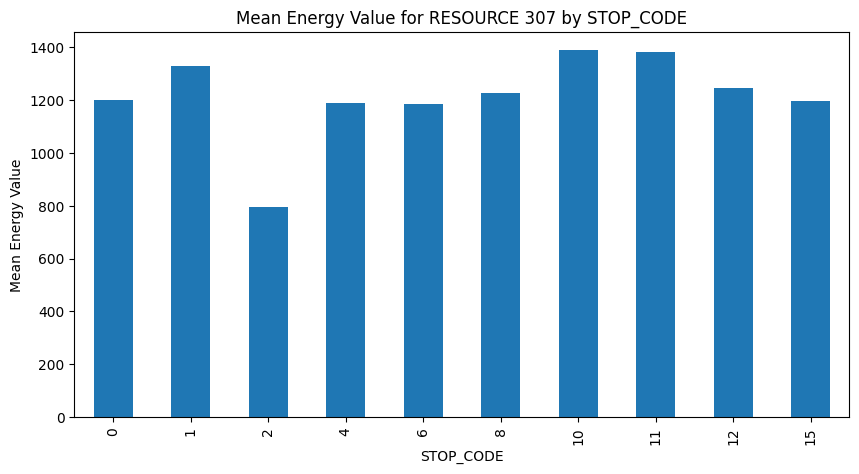

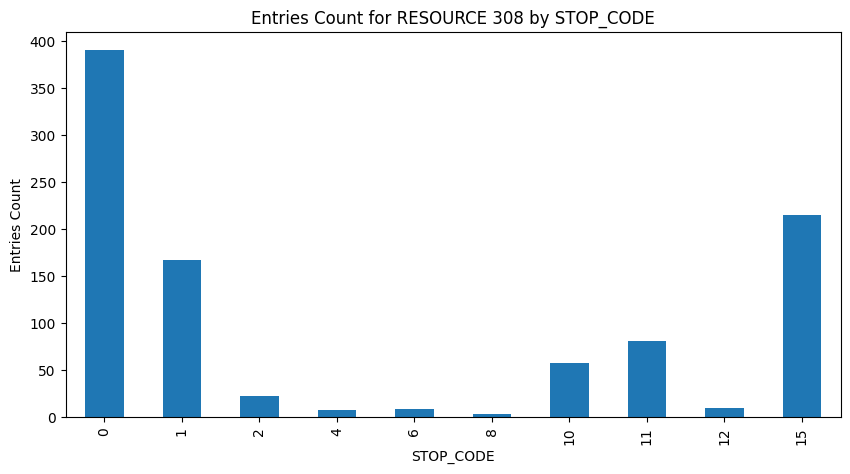

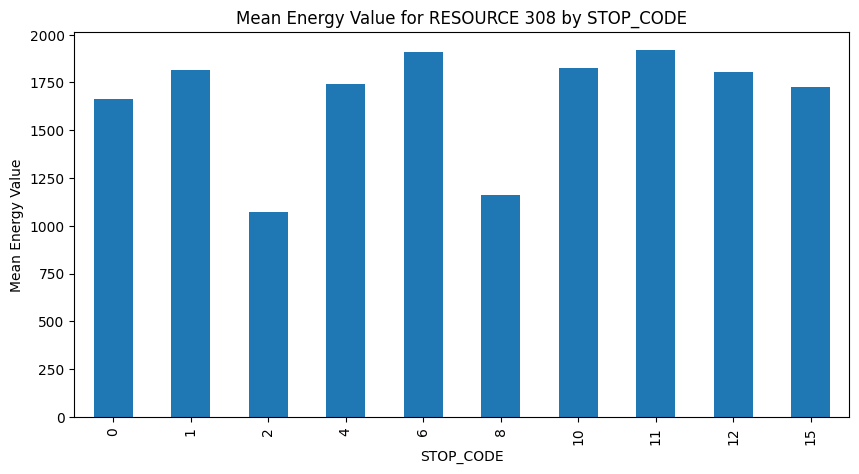

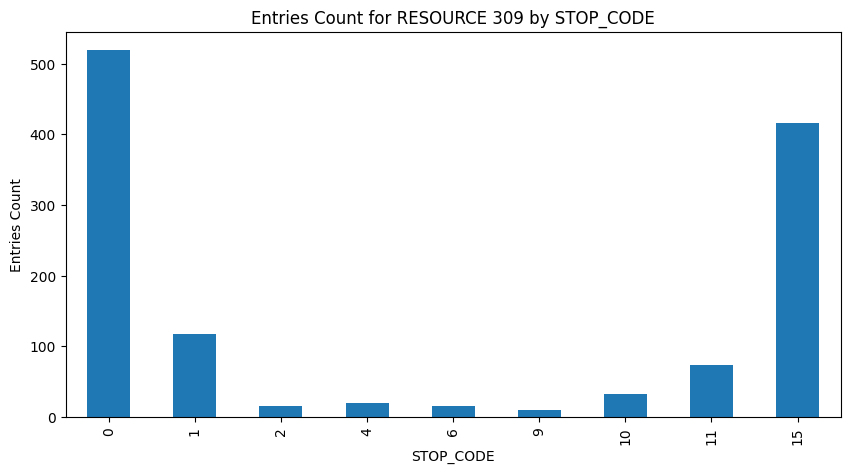

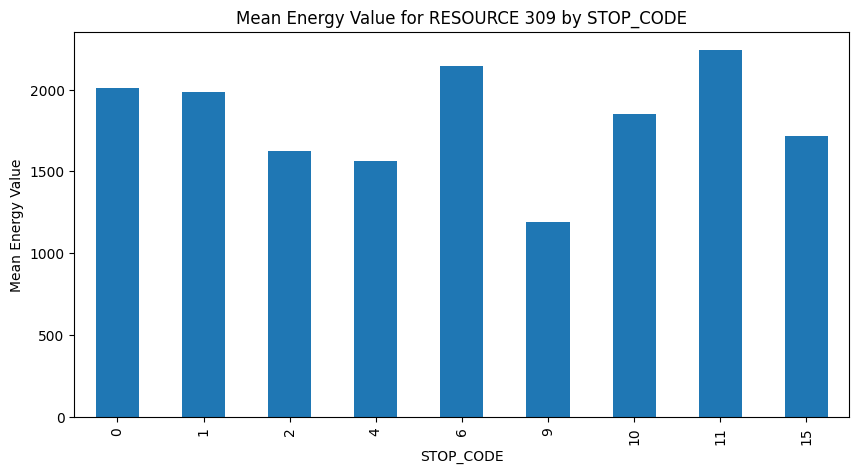

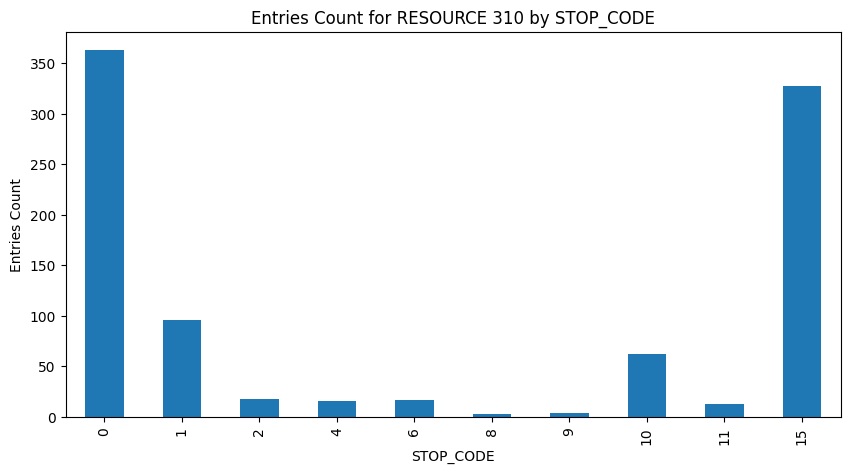

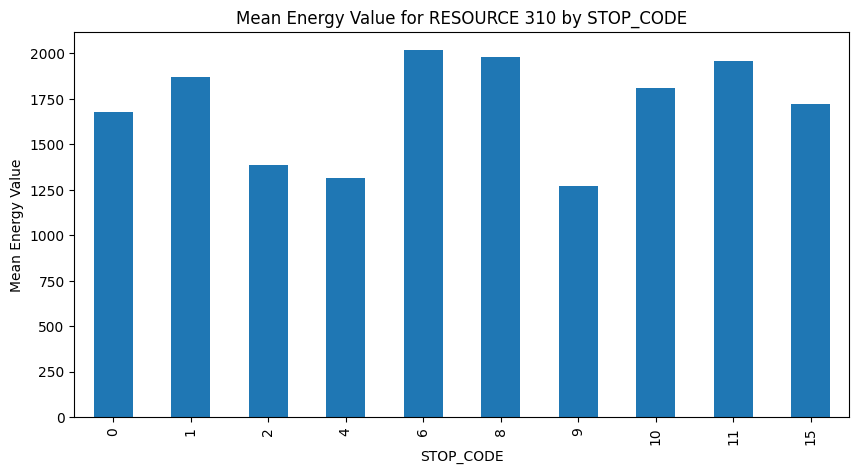

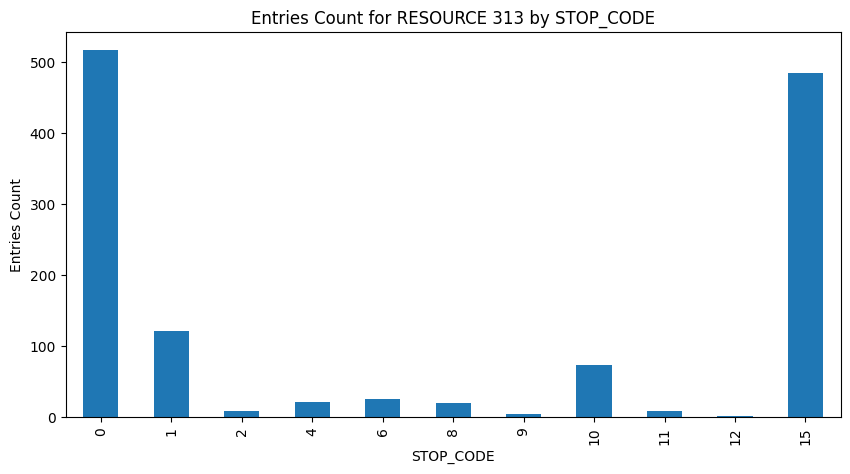

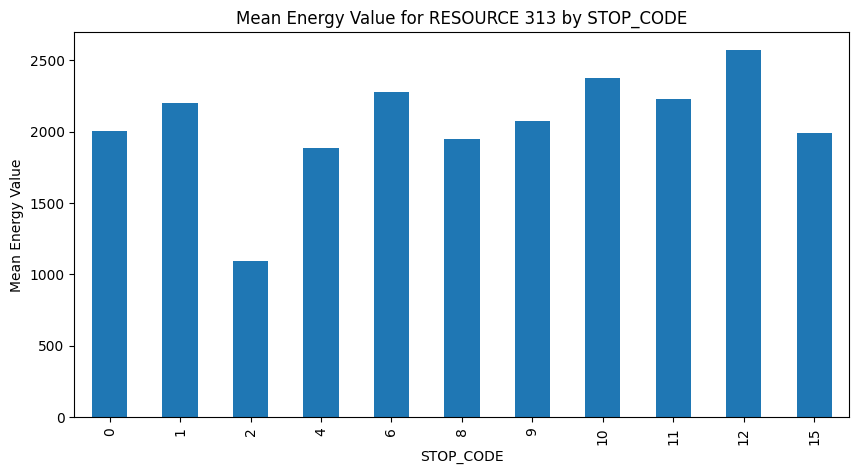

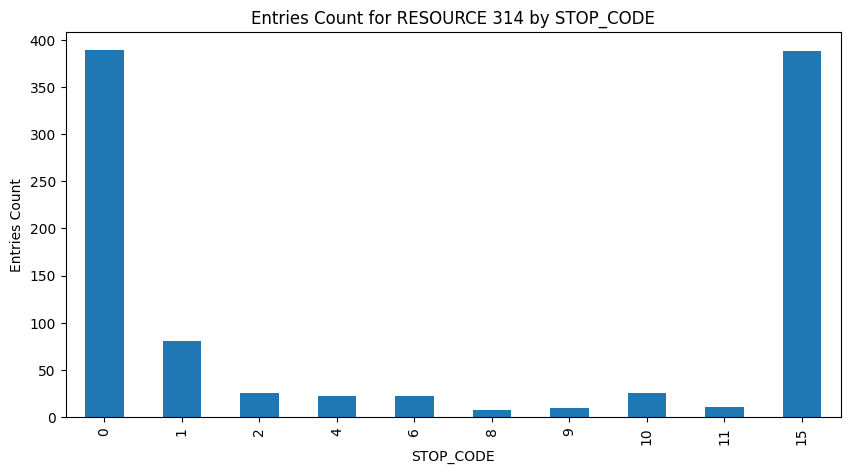

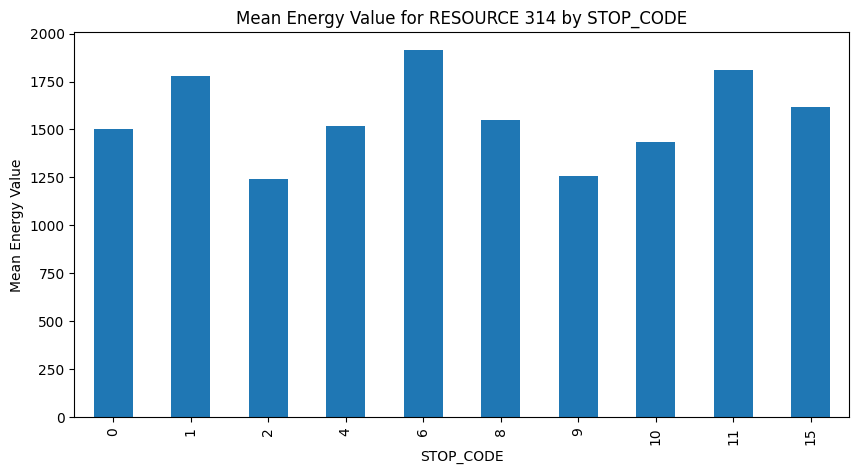

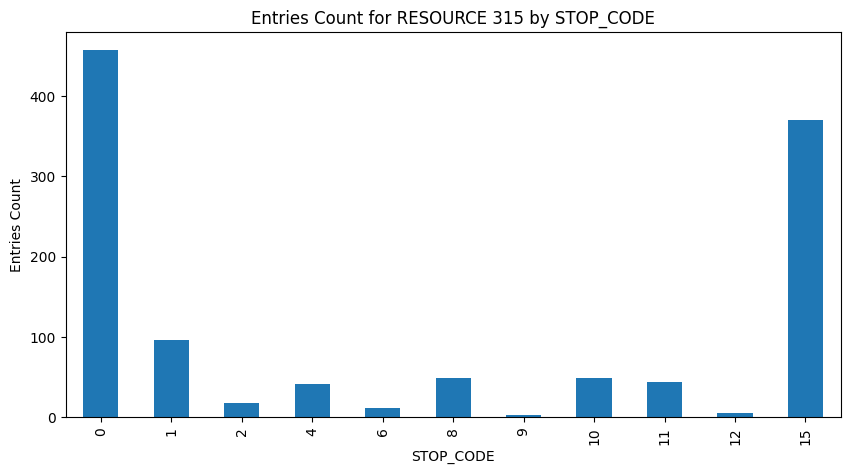

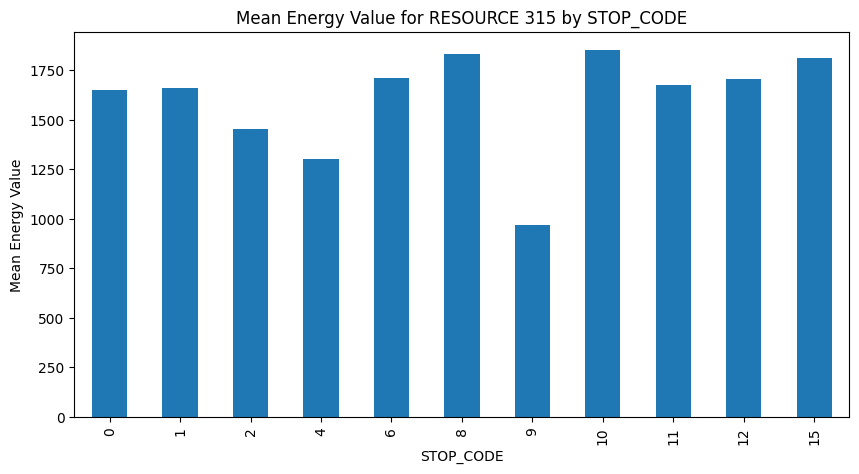

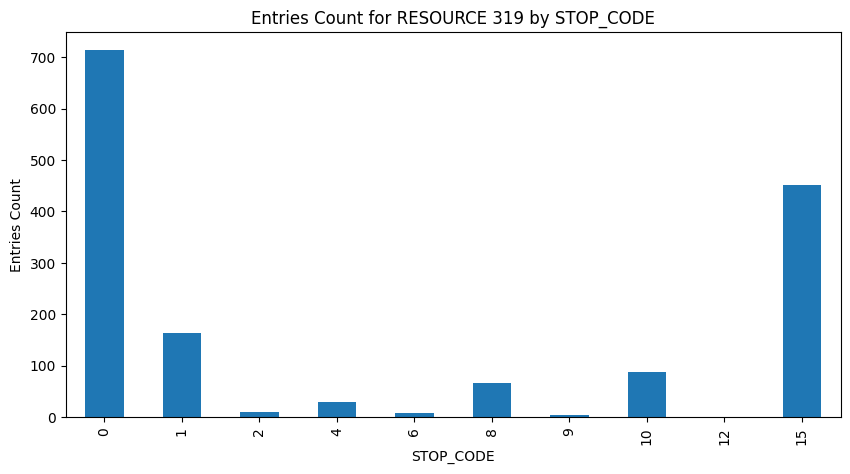

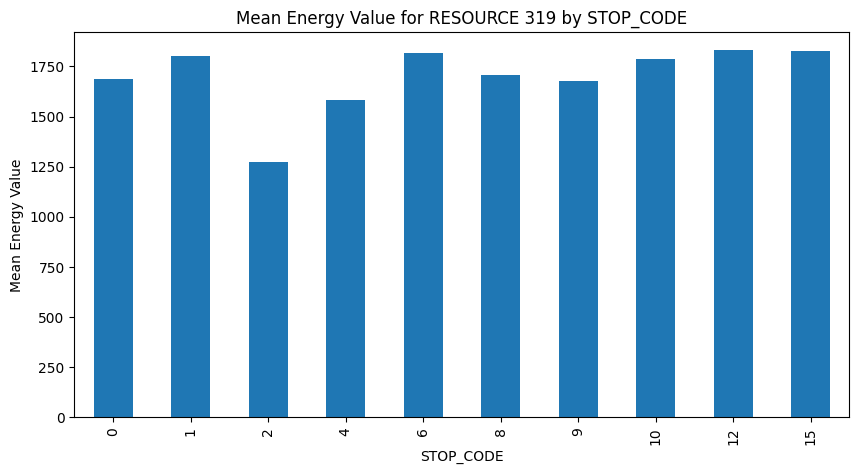

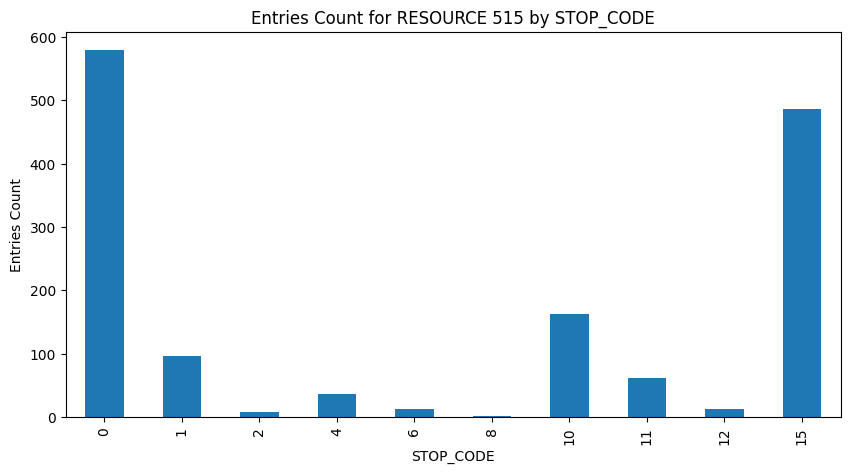

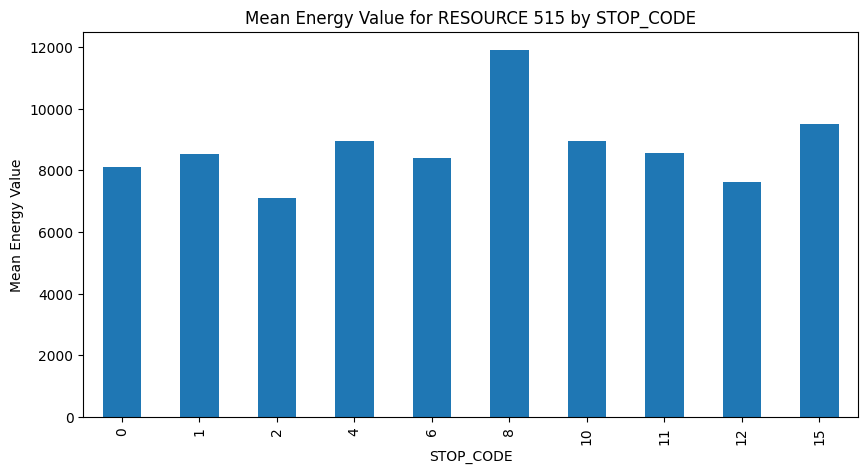

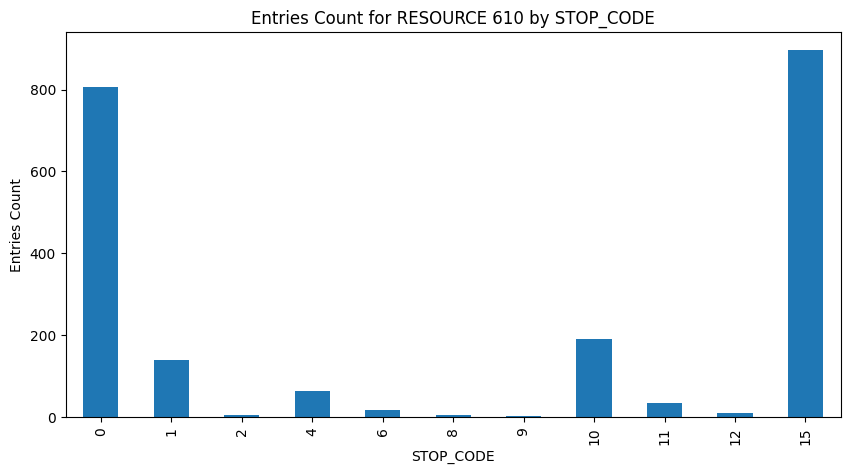

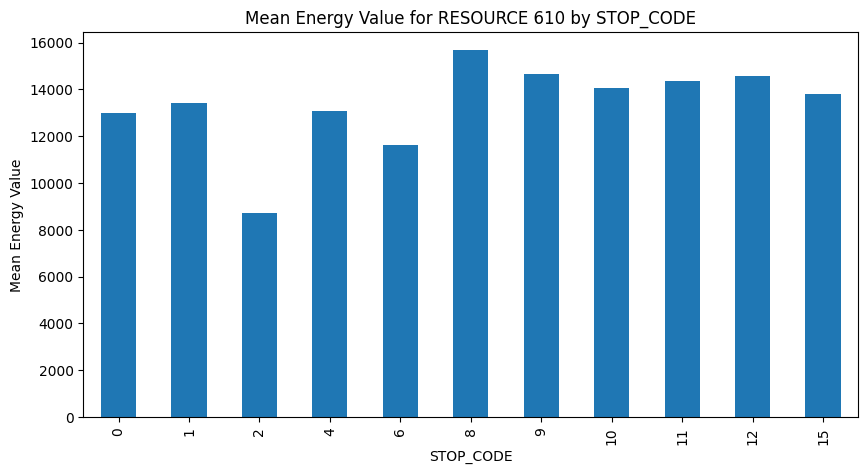

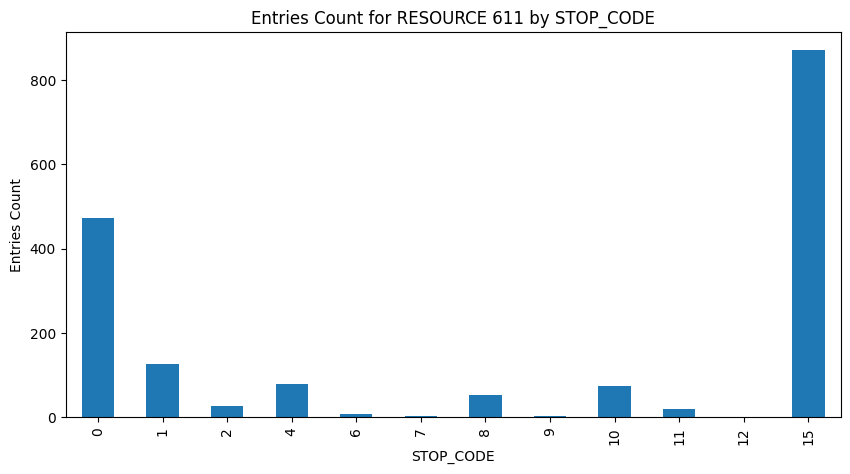

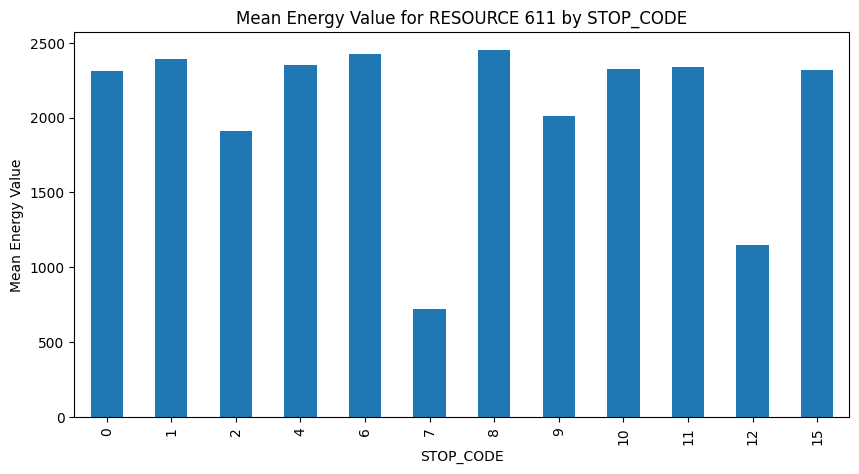

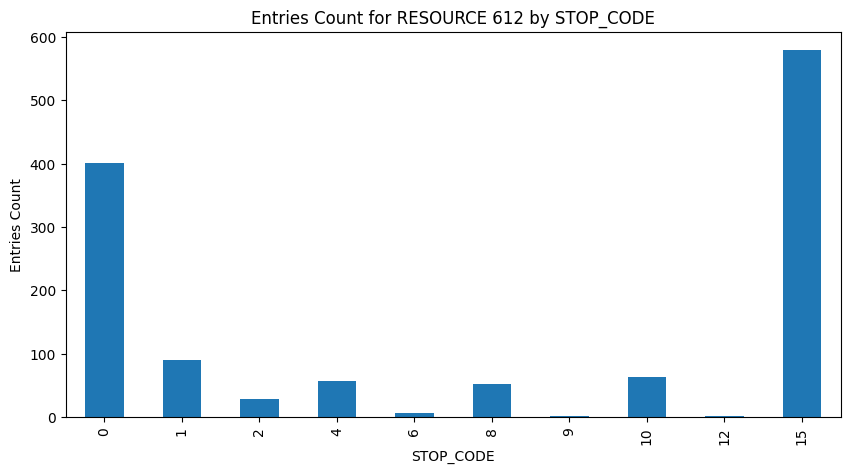

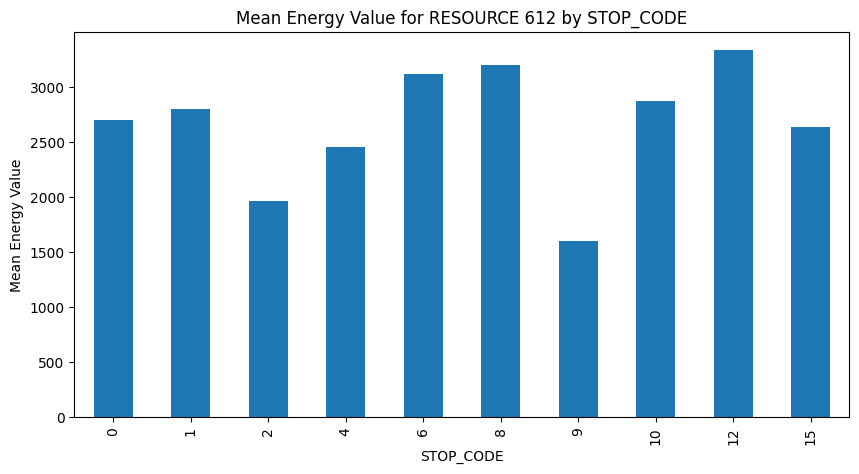

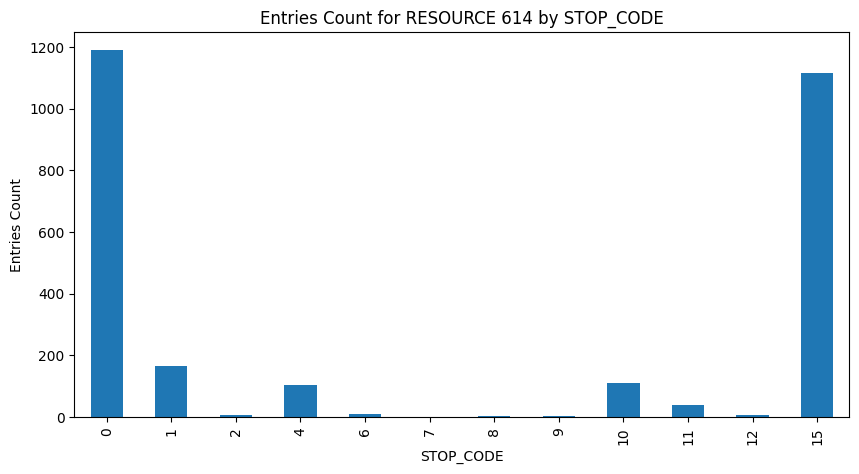

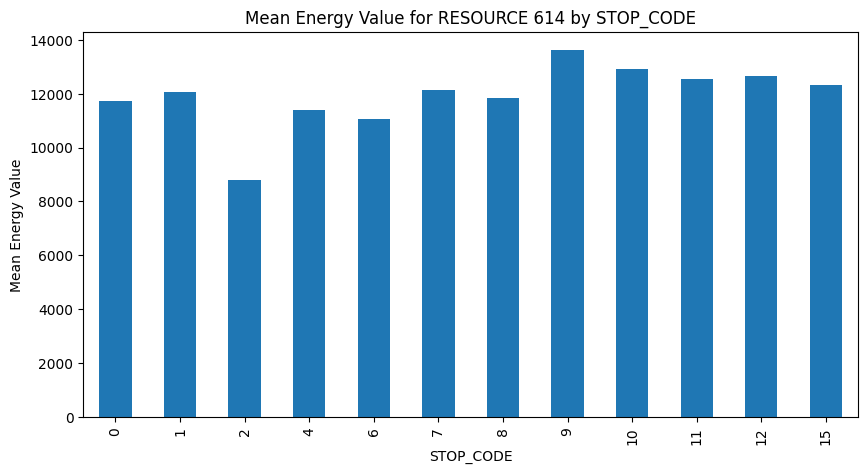

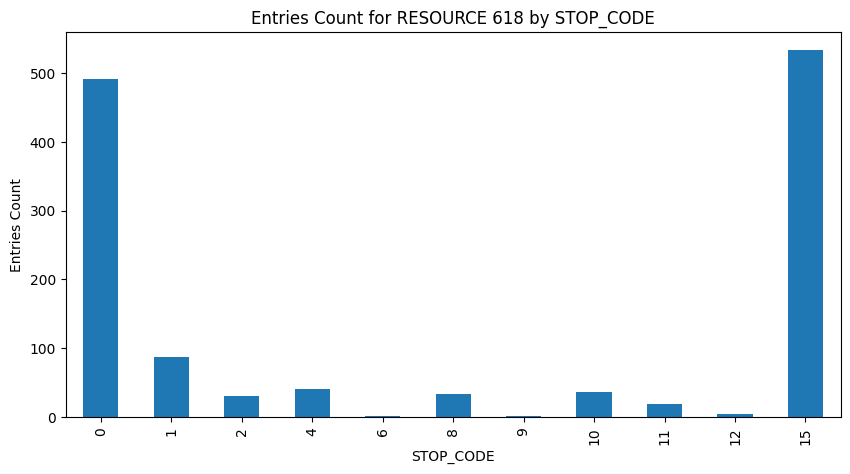

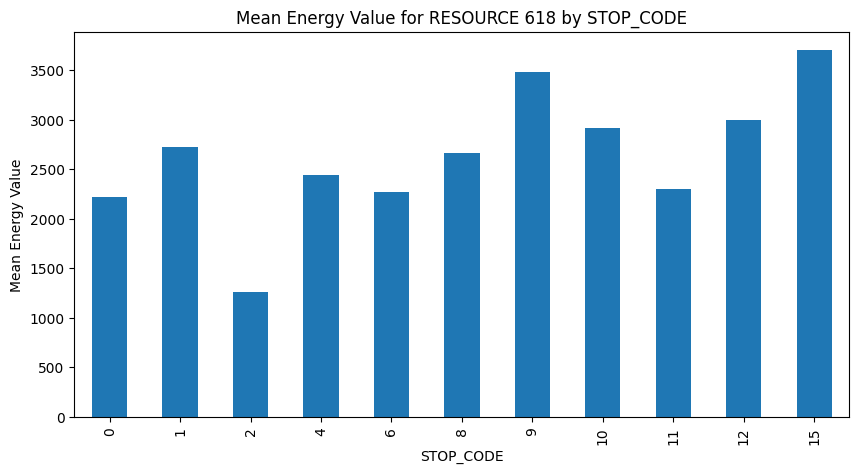

In [ ]:
for resource_value in resource_stop_code_stats.index.get_level_values('RESOURCE').unique():
    subset = resource_stop_code_stats.loc[resource_value]

    # Bar plot for Entries Count
    subset['Entries Count'].plot(kind='bar', figsize=(10, 5), title=f'Entries Count for RESOURCE {resource_value} by STOP_CODE')
    plt.xlabel('STOP_CODE')
    plt.ylabel('Entries Count')
    plt.show()

    # Bar plot for Mean Energy Value
    subset['Mean Energy Value'].plot(kind='bar', figsize=(10, 5), title=f'Mean Energy Value for RESOURCE {resource_value} by STOP_CODE')
    plt.xlabel('STOP_CODE')
    plt.ylabel('Mean Energy Value')
    plt.show()

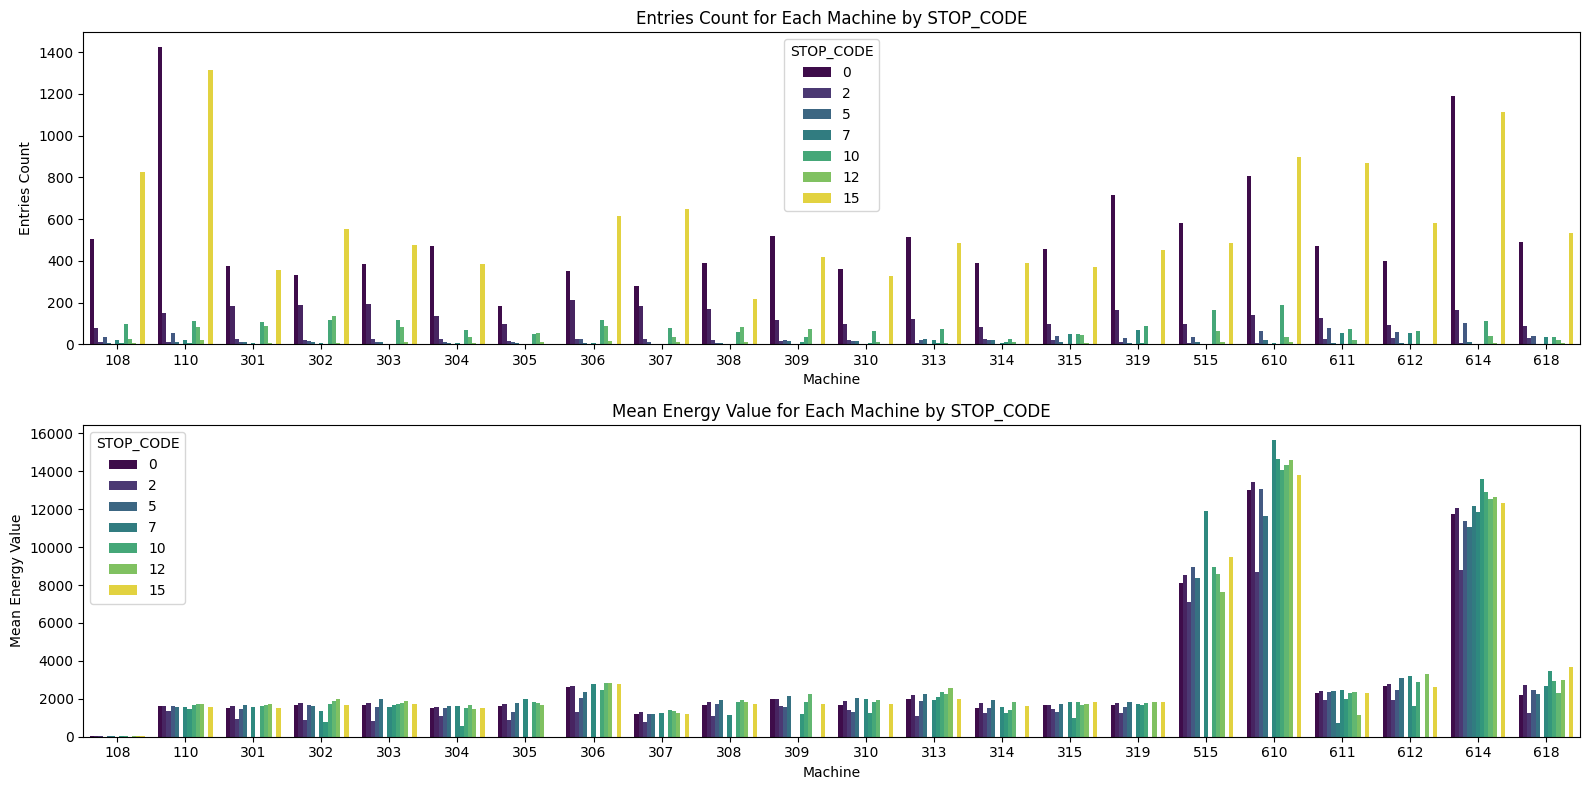

In [ ]:
plt.figure(figsize=(16, 8))

# Entries Count
plt.subplot(2, 1, 1)
sns.barplot(x='RESOURCE', y='Entries Count', hue='STOP_CODE', data=resource_stop_code_stats, palette='viridis')
plt.title('Entries Count for Each Machine by STOP_CODE')
plt.xlabel('Machine')
plt.ylabel('Entries Count')

# Mean Energy Value
plt.subplot(2, 1, 2)
sns.barplot(x='RESOURCE', y='Mean Energy Value', hue='STOP_CODE', data=resource_stop_code_stats, palette='viridis')
plt.title('Mean Energy Value for Each Machine by STOP_CODE')
plt.xlabel('Machine')
plt.ylabel('Mean Energy Value')

plt.tight_layout()
plt.show()


<ipython-input-55-a4f2156c8f2b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='RESOURCE', y='Entries Count', data=resource_stop_code_stats, inner='quartile', palette='viridis')
<ipython-input-55-a4f2156c8f2b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='RESOURCE', y='Mean Energy Value', data=resource_stop_code_stats, inner='quartile', palette='viridis')


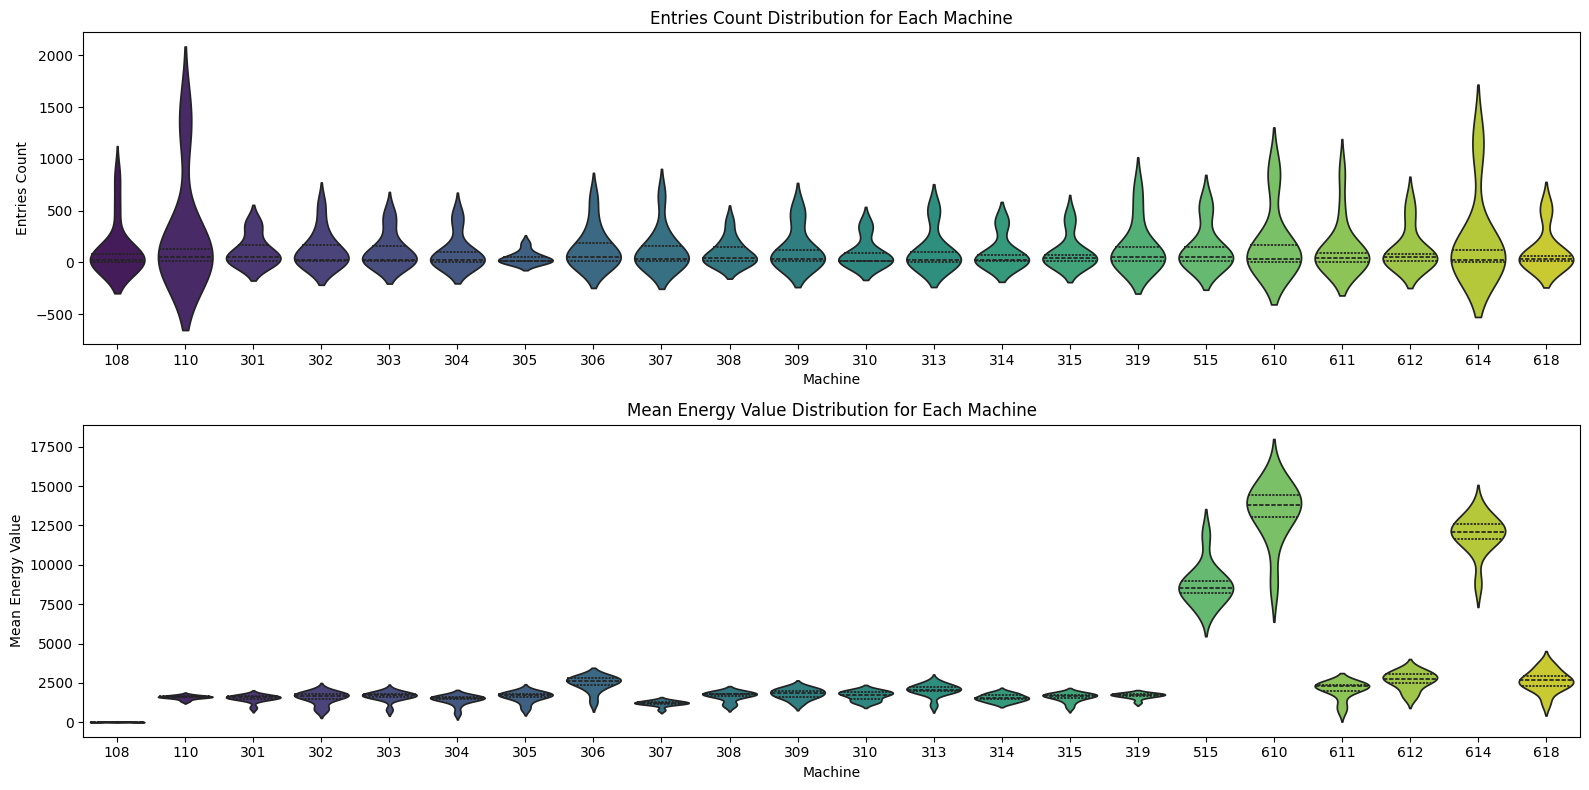

In [ ]:
plt.figure(figsize=(16, 8))

# Entries Count
plt.subplot(2, 1, 1)
sns.violinplot(x='RESOURCE', y='Entries Count', data=resource_stop_code_stats, inner='quartile', palette='viridis')
plt.title('Entries Count Distribution for Each Machine')
plt.xlabel('Machine')
plt.ylabel('Entries Count')

# Mean Energy Value
plt.subplot(2, 1, 2)
sns.violinplot(x='RESOURCE', y='Mean Energy Value', data=resource_stop_code_stats, inner='quartile', palette='viridis')
plt.title('Mean Energy Value Distribution for Each Machine')
plt.xlabel('Machine')
plt.ylabel('Mean Energy Value')

plt.tight_layout()
plt.show()